In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("WeightsAndAges.csv")
df.head()

,Weight,Height
0,57,170
1,60,173
2,80,169
3,89,160
4,50,150


In [21]:
df

,Weight,Height
0,57,170
1,60,173
2,80,169
3,89,160
4,50,150
5,46,153
6,79,172
7,90,170
8,60,157
9,70,158


In [6]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

In [10]:
print(df.duplicated().sum())

0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  19 non-null     int64
 1   Height  19 non-null     int64
dtypes: int64(2)
memory usage: 436.0 bytes


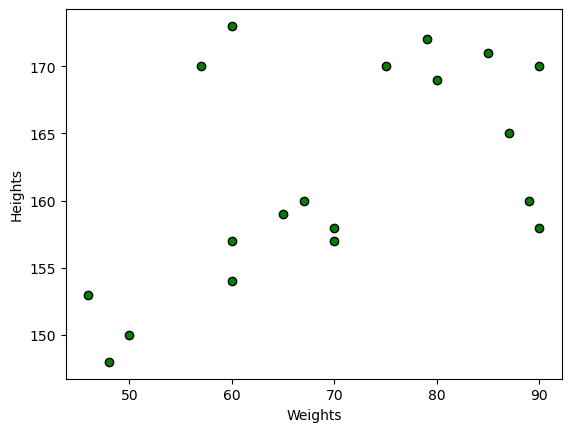

In [17]:
plt.scatter(df['Weight'],df['Height'],color='green')
plt.xlabel("Weights")
plt.ylabel("Heights")
plt.show()

In [19]:
df.corr()

,Weight,Height
Weight,1.000000,0.540286
Height,0.540286,1.000000


C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


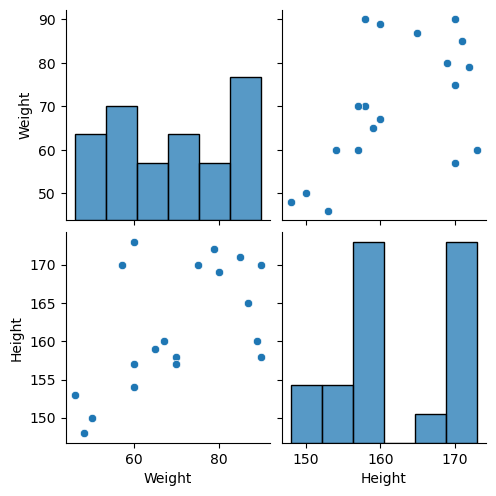

In [20]:
sns.pairplot(df)
plt.show()

In [23]:
x= df['Weight']
type(x)

pandas.core.series.Series

In [24]:
#independent features
x= df[['Weight']]
type(x)
#in our custom dataset each independent feature(column) should be DataFrame or 2D array

pandas.core.frame.DataFrame

In [26]:
#dependent feature
y=df['Height']
type(y)
#in our custom dataset each dependent feature(column) should be series or 1D array

pandas.core.series.Series

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [37]:
print(x_train)

    Weight
8       60
16      85
3       89
13      48
15      70
17      87
2       80
9       70
18      60
4       50
12      90
7       90
10      65
14      67
6       79


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)

array([[-0.91615484],
       [ 0.8920455 ],
       [ 1.18135756],
       [-1.784091  ],
       [-0.1928747 ],
       [ 1.03670153],
       [ 0.53040543],
       [-0.1928747 ],
       [-0.91615484],
       [-1.63943497],
       [ 1.25368557],
       [ 1.25368557],
       [-0.55451477],
       [-0.40985874],
       [ 0.45807742]])

In [40]:
x_test = scaler.transform(x_test)
x_test

array([[-1.13313888],
       [-1.92874703],
       [ 0.16876537],
       [-0.91615484]])

In [45]:
#applying simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)
print("Coefficient or slope",regression.coef_)
print("Intercept",regression.intercept_)

Coefficient or slope [0.39955824]
Intercept 131.49876772843524


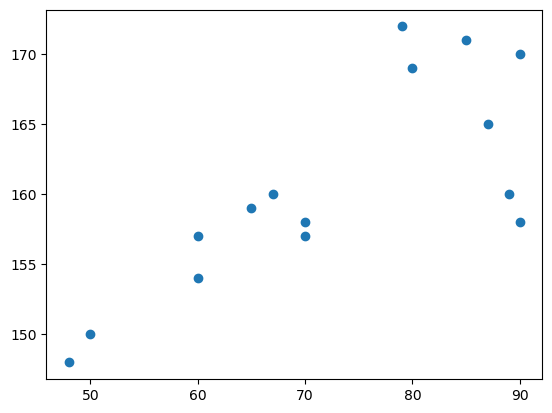

In [46]:
scatter = plt.scatter(x_train,y_train)
plt.show(scatter)

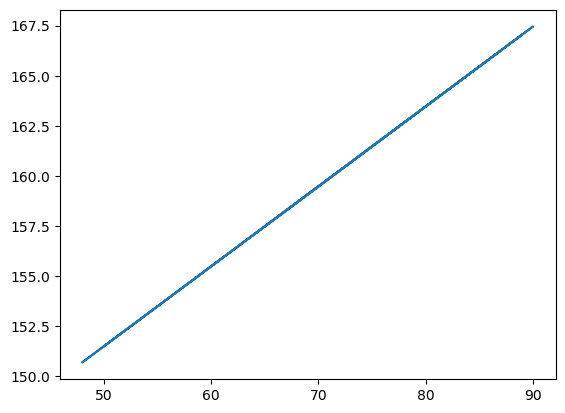

In [47]:
slope_of_best_fit = plt.plot(x_train,regression.predict(x_train))